# Preamble

Gini computes the degree of probability of a specific variable that is wrongly being classified when chosen randomly and a variation of gini coefficient

# Problem 1 : Predicting CentralAir using SalePrice
In this problem, you will build a Classification Tree model to predict CentralAir using SalePrice and judge its accuracy.

a) Create appropriate datasets for Train and Test in an 80:20 ratio and fit two Classification Tree models (of max
depth 2 and max depth 4) on the Train set to predict CentralAir using SalePrice. Print the tree in each case.

b) Print the confusion matrix on Train set and Test set for both the aforesaid models. Compute and print for both
the trees the Classification Accuracy, True Positive Rate, False Positive Rate. Which of the two models is better?

Hints and Pointers

o If you take just the first 80% of the data as train and the next 20% as test, it may not be the best train test split. 

o If you want to change the max depth of the tree, check the input parameters needed to instantiate the model. 

o Think about the accuracy metrics for a tree carefully to determine which model is better and in which metrics.

Answer: The model with a depth of 2 seems to slighty more accurate than the model with a depth of 4.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree
from sklearn.metrics import classification_report

sb.set()

In [2]:
from sklearn import metrics

In [3]:
dataset_house = pd.read_csv('./data/train.csv')
dataset_house

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


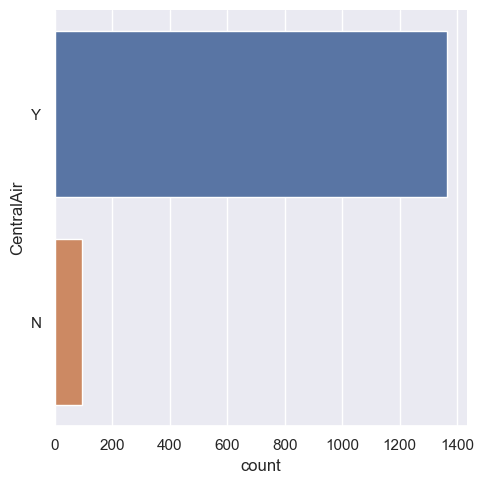

In [4]:
sb.catplot(y = "CentralAir", data = dataset_house, kind = "count")

In [5]:
dataset_house['CentralAir'].value_counts()

Y    1365
N      95
Name: CentralAir, dtype: int64

In [6]:
dataset_house['CentralAir'].value_counts().index.tolist()

['Y', 'N']

In [7]:
def ct(X, y, df, depth):
    
    X_train, X_test, y_train, y_test = train_test_split(pd.DataFrame(df[X]), pd.DataFrame(df[y]), test_size=0.2, random_state=42)
    
    # Decision Tree using Train Data
    dectree = DecisionTreeClassifier(max_depth = depth)  # create the decision tree object
    dectree.fit(X_train, y_train)                    # train the decision tree model
    
    y_train_pred = dectree.predict(X_train)
    y_test_pred = dectree.predict(X_test)

    # Check the Goodness of Fit (on Train Data)
    print("Goodness of Fit of Model \tTrain Dataset")
    print("Classification Accuracy \t:", dectree.score(X_train, y_train))
    print()

    # Check the Goodness of Fit (on Test Data)
    print("Goodness of Fit of Model \tTest Dataset")
    print("Classification Accuracy \t:", dectree.score(X_test, y_test))
    print()
    
    print("Classification Report \tTest Dataset")
    print(classification_report(y_test, y_test_pred))
    print()

    # Plot the Confusion Matrix for Train and Test
    f, axes = plt.subplots(1, 2, figsize=(12, 4))
    sb.heatmap(confusion_matrix(y_train, y_train_pred), annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
    sb.heatmap(confusion_matrix(y_test, y_test_pred), annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

    f = plt.figure(figsize=(12,12))
    
    # Print the Accuracy Measures from the Confusion Matrix
    cmTrain = confusion_matrix(y_train, y_train_pred)
    tpTrain = cmTrain[1][1] # True Positives : Y (1) predicted Y (1)
    fpTrain = cmTrain[0][1] # False Positives : N (0) predicted Y (1)
    tnTrain = cmTrain[0][0] # True Negatives : N (0) predicted N (0)
    fnTrain = cmTrain[1][0] # False Negatives : Y (1) predicted N (0)
    
    # Print the Accuracy Measures from the Confusion Matrix
    cmTest = confusion_matrix(y_test, y_test_pred)
    tpTest = cmTest[1][1] # True Positives : Y (1) predicted Y (1)
    fpTest = cmTest[0][1] # False Positives : N (0) predicted Y (1)
    tnTest = cmTest[0][0] # True Negatives : N (0) predicted N (0)
    fnTest = cmTest[1][0] # False Negatives : Y (1) predicted N (0)

    print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
#     print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
    print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
#     print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))
    print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
#     print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
    print("FPR Test :\t", (fpTest/(tnTest + fpTest)))

    
#     print(df[y].value_counts().index.tolist())
    plot_tree(dectree, filled=True, rounded=True, feature_names=X, class_names=['N', 'Y'])
    plt.show()
 

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9375

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.958904109589041

Classification Report 	Test Dataset
              precision    recall  f1-score   support

           N       0.50      0.50      0.50        12
           Y       0.98      0.98      0.98       280

    accuracy                           0.96       292
   macro avg       0.74      0.74      0.74       292
weighted avg       0.96      0.96      0.96       292


TPR Train :	 0.9953917050691244
FPR Train :	 0.8192771084337349
TPR Test :	 0.9785714285714285
FPR Test :	 0.5


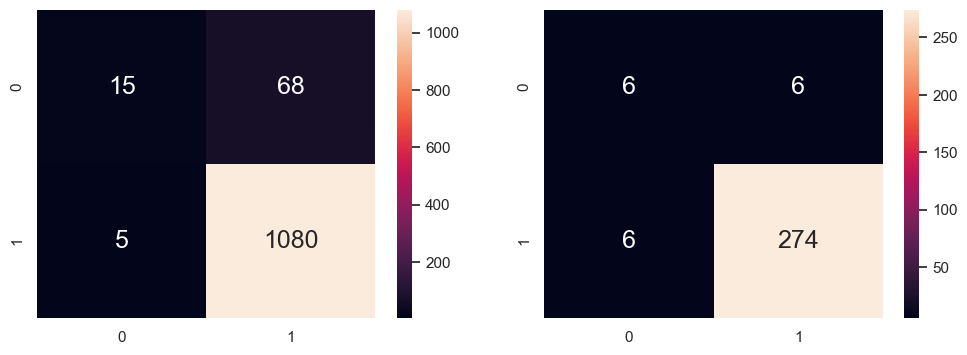

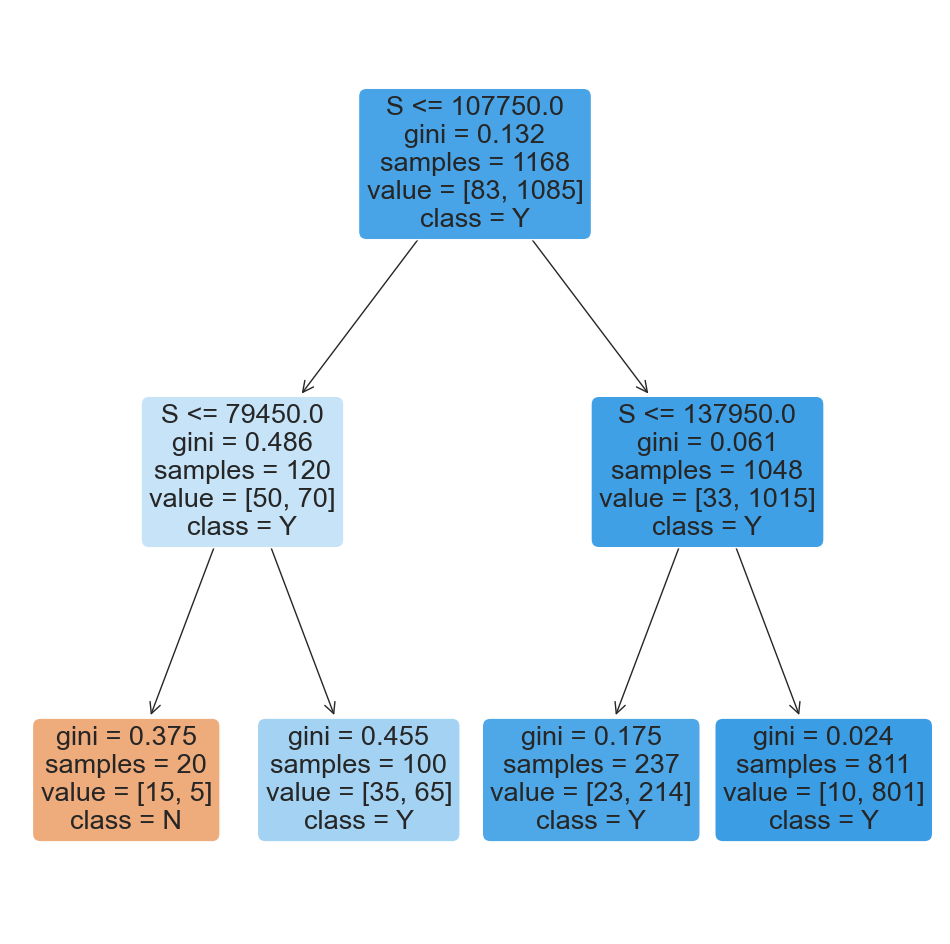

In [8]:
ct(X='SalePrice', y='CentralAir', df=dataset_house, depth=2)

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9417808219178082

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9486301369863014

Classification Report 	Test Dataset
              precision    recall  f1-score   support

           N       0.40      0.50      0.44        12
           Y       0.98      0.97      0.97       280

    accuracy                           0.95       292
   macro avg       0.69      0.73      0.71       292
weighted avg       0.95      0.95      0.95       292


TPR Train :	 0.9944700460829493
FPR Train :	 0.7469879518072289
TPR Test :	 0.9678571428571429
FPR Test :	 0.5


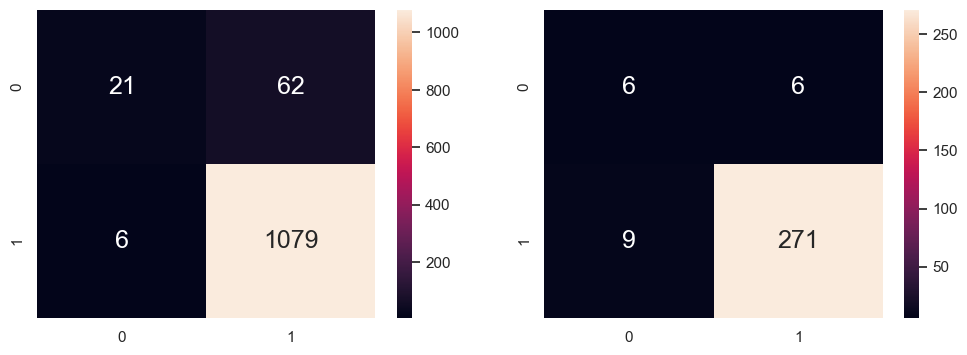

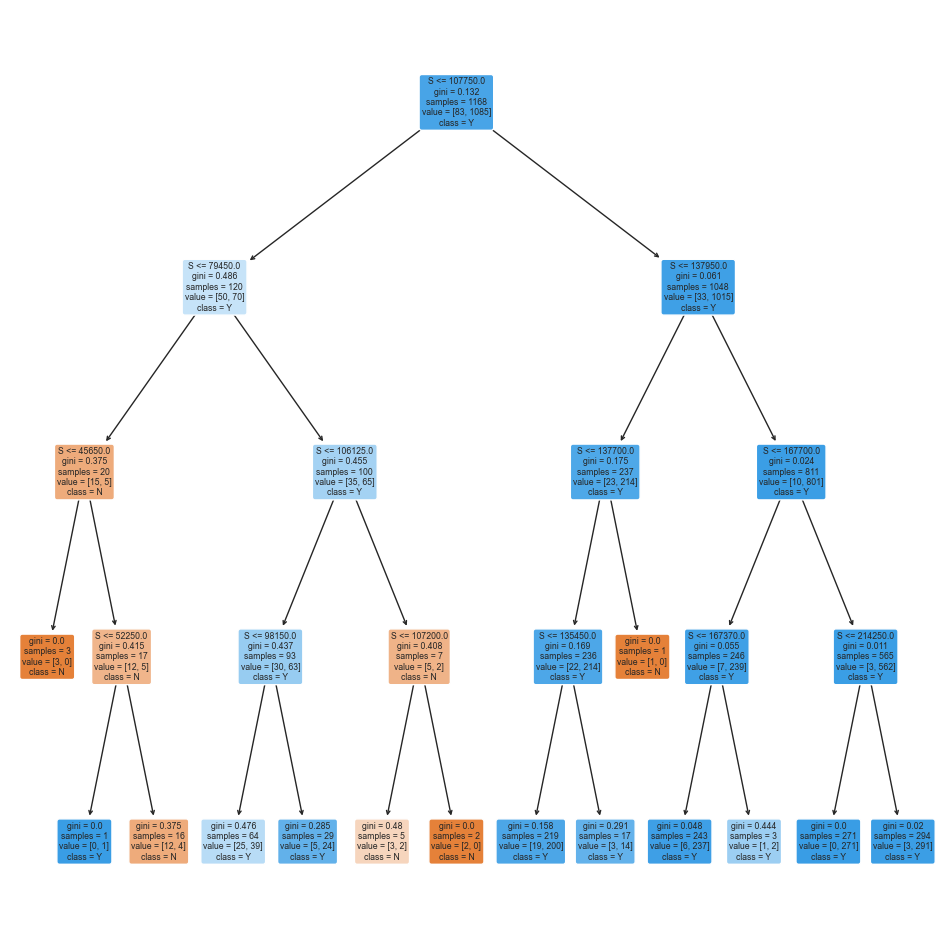

In [9]:
ct(X='SalePrice', y='CentralAir', df=dataset_house, depth=4)

# Problem 2 : Predicting CentralAir using Other Variables
Following the steps from the previous problem, build two new uni-variate Classification Tree models (of max depth 4) to predict CentralAir using the variables OverallQual and YearBuilt. Justify which of the variables is the best predictor.

Hints and Pointers

o Same as Problem 1, just on other variables. You can compare models using the metrics you are printing anyway. 

o Optional: You may think of writing a simple Python function to do classification on variable(s) in a given dataset.


Answer: <code>OverallQual</code> seems to a better feature when it comes to predicting <code>CentralAir</code> given its higher classification accuracy of 0.973 as compared to 0.959 respectively

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9315068493150684

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9726027397260274

Classification Report 	Test Dataset
              precision    recall  f1-score   support

           N       0.83      0.42      0.56        12
           Y       0.98      1.00      0.99       280

    accuracy                           0.97       292
   macro avg       0.90      0.71      0.77       292
weighted avg       0.97      0.97      0.97       292


TPR Train :	 0.992626728110599
FPR Train :	 0.8674698795180723
TPR Test :	 0.9964285714285714
FPR Test :	 0.5833333333333334


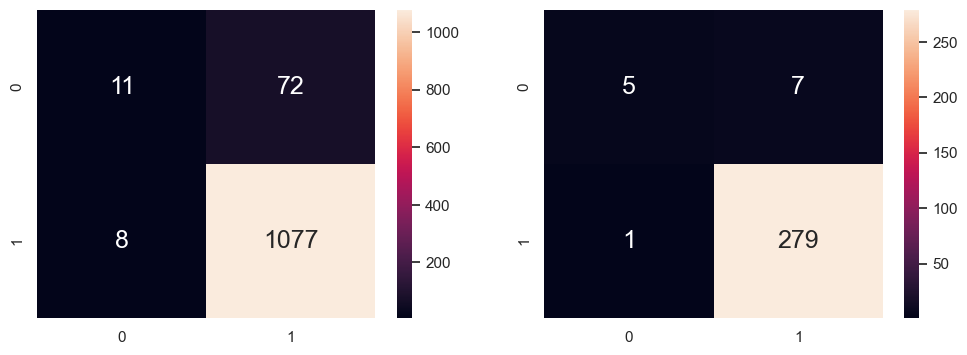

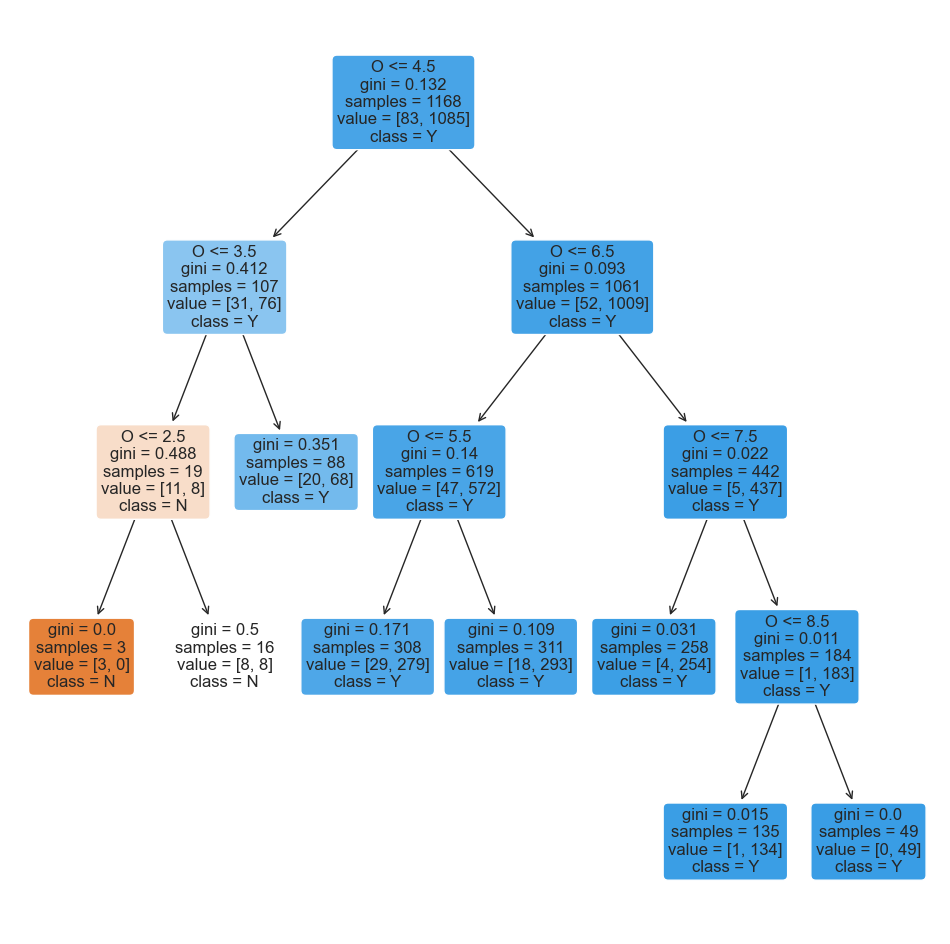

In [10]:
ct(X='OverallQual', y='CentralAir', df=dataset_house, depth=4)

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9306506849315068

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.958904109589041

Classification Report 	Test Dataset
              precision    recall  f1-score   support

           N       0.00      0.00      0.00        12
           Y       0.96      1.00      0.98       280

    accuracy                           0.96       292
   macro avg       0.48      0.50      0.49       292
weighted avg       0.92      0.96      0.94       292


TPR Train :	 1.0
FPR Train :	 0.9759036144578314
TPR Test :	 1.0
FPR Test :	 1.0


/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


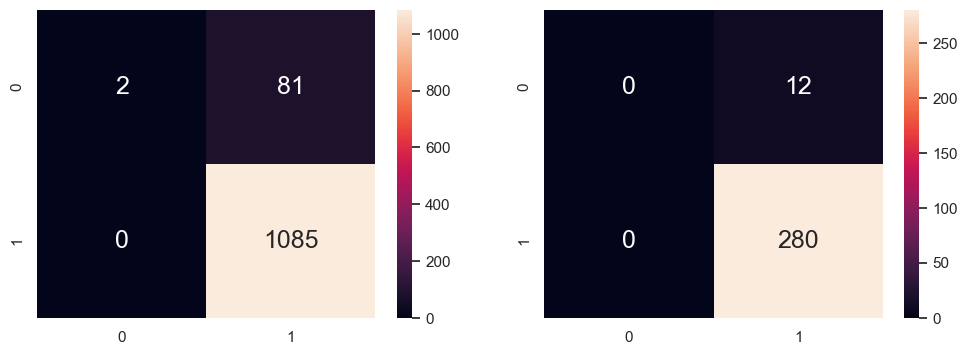

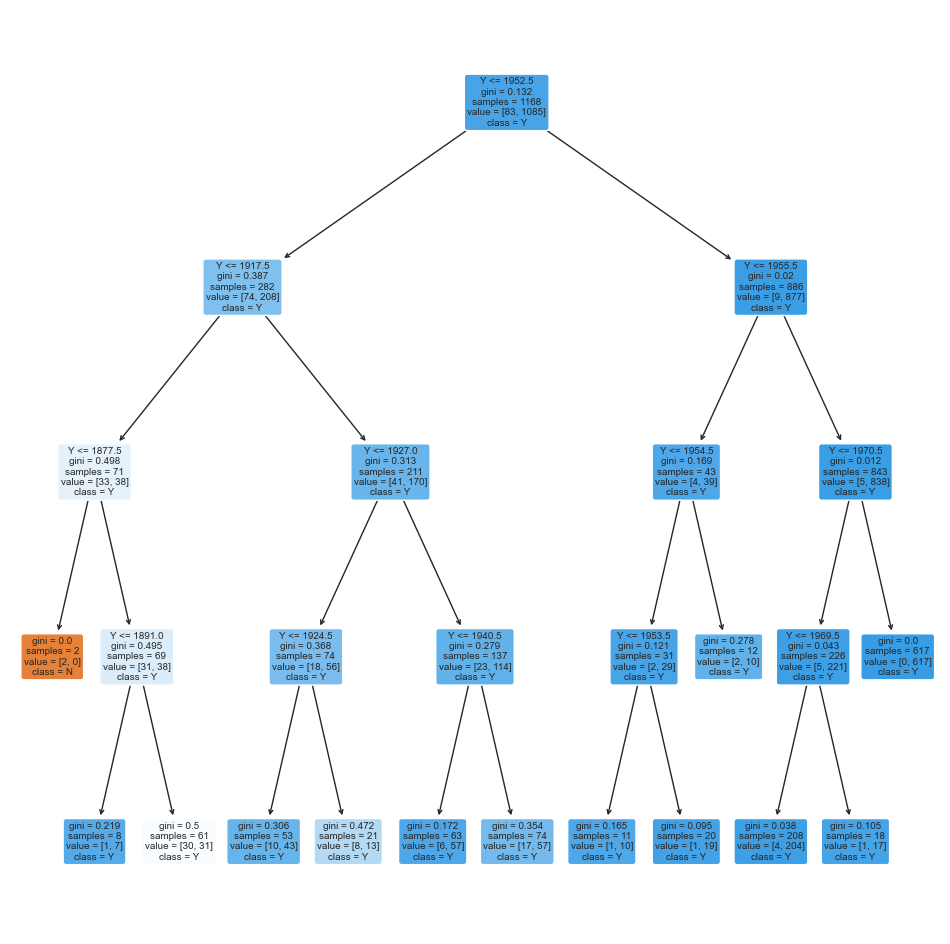

In [11]:
ct(X='YearBuilt', y='CentralAir', df=dataset_house, depth=4)

# Problem 3 : Understanding the Misclassified Samples
In this problem, you will consider finer details of the tree model and try to isolate the misclassified samples for a model.


(a) Print the Classification Tree of max depth 4 that you fit in Problem1(a).Note that each leaf node of your tree represents a specific partition of your training data, based on certain conditions given by the splits in the tree. Find out which leaf node of this tree has the highest number of False Positives (FP) in the training dataset and print all samples in the Train set (rows from the dataframe) that end up in this leaf node (partition) during fit.


(b) Print ONLY the False Positive cases (rows from the dataframe) from the samples(rows) extracted in part(a).


Hints and Pointers


o In Part (a), you may print the model in Problem 1(a), or fit the max depth 4 classification tree model once again. 

o You may simply “observe” which leaf node has the maximum number of False Positives; no need to code for it. 

o Think about how data points (samples) end up in a leaf node based on tree splits; it will help you isolate samples. 

o Part (b) is a simple continuation of part (a), where you need to “filter” out the False Positives from the samples.



Answer: The 3rd leaf node from the left in level 4 of the tree has the highest number of false positives when looking at value[0] array as compared to the rest of the leaf nodes for class = Y. 

<br/>


Given there are 64 data points (25 negatives and 39 positives): 

39 data points are correctly classified, which means the value in value[1] is true positive,

25 data points are wrongly classified, which means the value in value[0] is false positive. 



<br/>

Class = Y means <code>CentralAir</code> = True


Class = N means <code>CentralAir</code> = False

Here we are finding out the false positives (predicted true, while actual is false), which narrows to finding <code>CentralAir</code> = False in Class = Y. 


Hence, we can ignore all nodes with Class = N.


<br/>
 In order to filter out the false positives, we need to trace the tree for the underlying conditions for the split. 
 

First split at root is SalePrice <= 107750.0, as we go towards the left branch of the tree.

Second split at level 1 is SalePrice > 79450.0 as we go towards the right branch at this level.

Third split at level 2 is SalePrice <= 106125.0 as we go towards the left branch at this level.

Fourth split at level 3 is SalePrice <= 98150.0 as we go towards the left branch at this stage.

With the splits combined, our filtering logic to reach the target leaf node is 79450.0 < SalePrice <= 98150.0.

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9417808219178082

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9486301369863014

Classification Report 	Test Dataset
              precision    recall  f1-score   support

           N       0.40      0.50      0.44        12
           Y       0.98      0.97      0.97       280

    accuracy                           0.95       292
   macro avg       0.69      0.73      0.71       292
weighted avg       0.95      0.95      0.95       292


TPR Train :	 0.9944700460829493
FPR Train :	 0.7469879518072289
TPR Test :	 0.9678571428571429
FPR Test :	 0.5


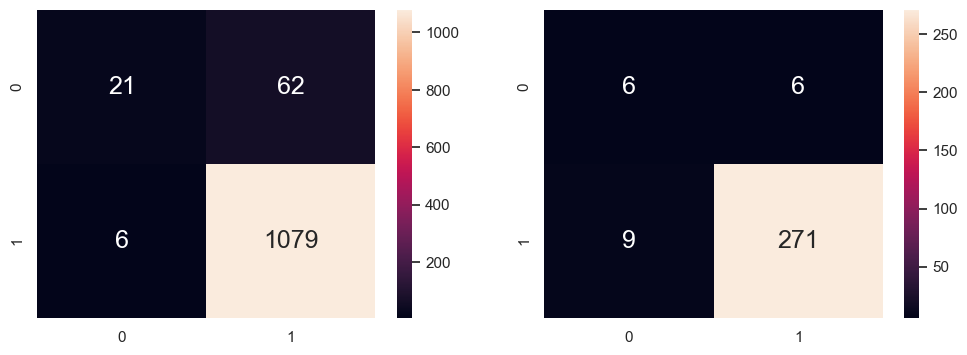

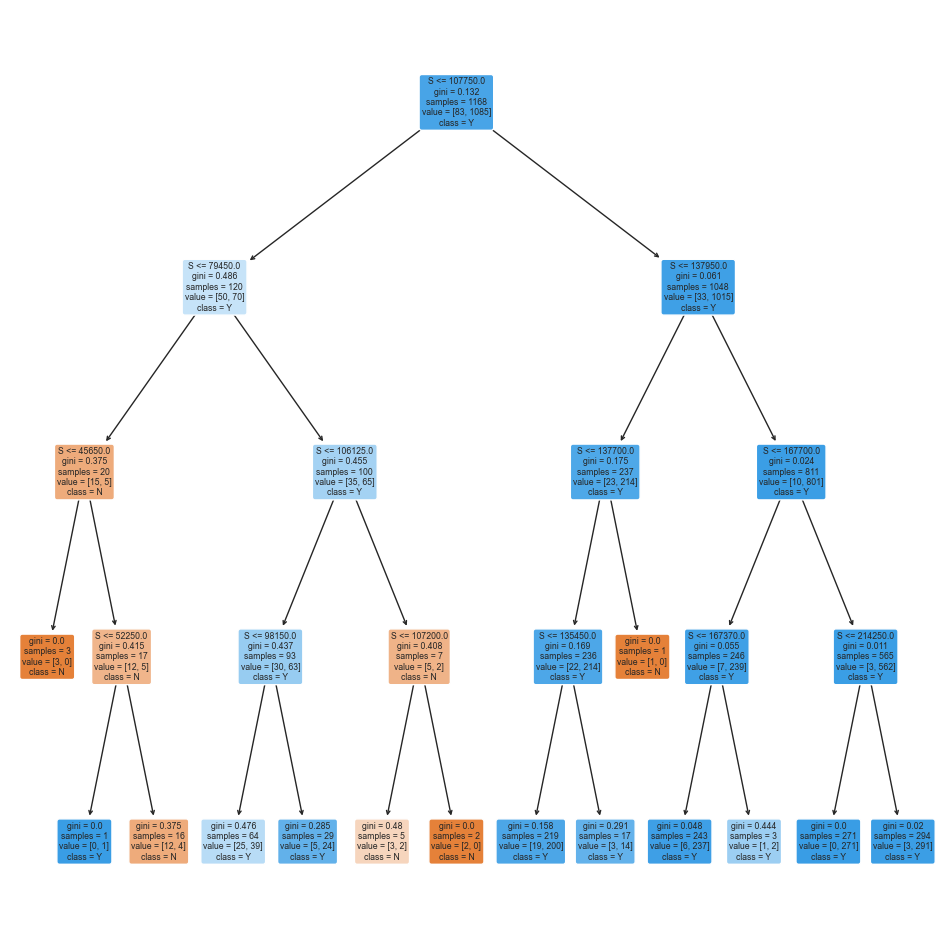

In [12]:
ct(X='SalePrice', y='CentralAir', df=dataset_house, depth=4)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(pd.DataFrame(dataset_house['SalePrice']), pd.DataFrame(dataset_house['CentralAir']), test_size=0.2, random_state=42)

total_train = X_train.join(y_train).reindex(X_train.index)


# Filter to the target leaf node
filter_rule = (79450.0 < total_train["SalePrice"]) & (total_train["SalePrice"] <= 98150)
filter_set = total_train[filter_rule]

# Check the data points after filter
print("Filtered set :", filter_set.shape)
print("CentralAir in the Leaf Node")
print(filter_set["CentralAir"].value_counts())

print(filter_set)

# Extract the False Positives
fp_set = filter_set[filter_set['CentralAir'] == 'N']
fp_set

Filtered set : (64, 2)
CentralAir in the Leaf Node
Y    39
N    25
Name: CentralAir, dtype: int64
      SalePrice CentralAir
638       85000          Y
514       96500          N
342       87500          N
210       98000          N
1137      94000          N
...         ...        ...
1378      83000          Y
632       82500          Y
1038      97000          Y
98        83000          N
1086      83500          Y

[64 rows x 2 columns]


,SalePrice,CentralAir
514,96500,N
342,87500,N
210,98000,N
1137,94000,N
1013,85000,N
438,90350,N
352,95000,N
88,85000,N
1376,91000,N
325,87000,N
